In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split

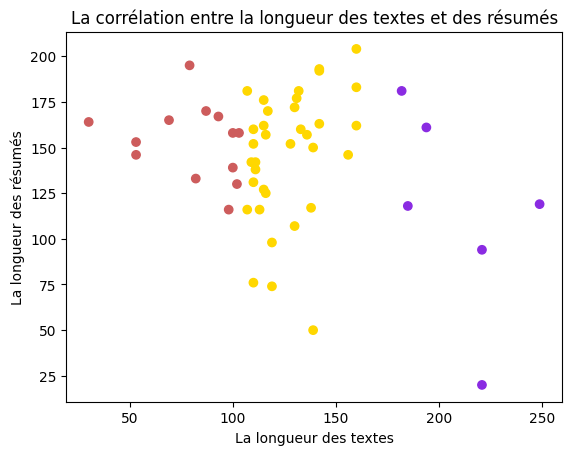

In [2]:
# Mesure la corrélation entre les variables : CONTENT et la DESCRIPTION

df = pd.read_csv("../../figures/nyt_data.csv", sep=",")

# Nettoyage des données
df.dropna(inplace=True)

# Pour appliquer des couleurs selon la longueur, on va créer la variable categorie
df["categorie"] = pd.cut(df["CONTENT"].apply(len), bins=3, labels=["Court", "Moyen", "Long"])
colors = {"Court": "indianred", "Moyen": "gold", "Long": "blueviolet"}

# On veut visualiser la corrélation de nos variables en appliquant selon la longueur de notre texte et des résumés
plt.scatter(df["CONTENT"].apply(len), df["DESCRIPTION"].apply(len), c=df["categorie"].map(colors))
plt.xlabel("La longueur des textes")
plt.ylabel("La longueur des résumés")
plt.title("La corrélation entre la longueur des textes et des résumés")
plt.show()


In [3]:
# Printer (afficher) la corrélation avec Pearson entre la longueur des textes et des résumés
correlation, p_value = pearsonr(df['CONTENT'].apply(len), df['DESCRIPTION'].apply(len))
print("La corrélation entre la longueur des textes et des résumés:", correlation)
print("La p-value :", p_value)

La corrélation entre la longueur des textes et des résumés: -0.23521990332014103
La p-value : 0.08686425401448802


In [4]:
"""
1) Corrélation plutôt négative : -0.235
La relation entre les deux variables est assez faible :(

2) p-value : 0.087

=> une petite corrélation inverse entre la longueur des textes et des résumés, 
MAIS pas statistiquement significative car on a pas assez de données pour l'affirmer
"""

"\n1) Corrélation plutôt négative : -0.235\nLa relation entre les deux variables est assez faible :(\n\n2) p-value : 0.087\n\n=> une petite corrélation inverse entre la longueur des textes et des résumés, \nMAIS pas statistiquement significative car on a pas assez de données pour l'affirmer\n"

In [5]:
# Splitter le corpus en train et test
first_train, second_train, first_test, second_test= train_test_split(df['CONTENT'], df['DESCRIPTION'], test_size=0.2, random_state=42)


In [6]:
# Malheureusement, je n'ai pas réussi à faire le reste du TP :(